## Abstraction and Reasoning Challenge

<div>
    <img src='https://cdn-images-1.medium.com/max/1000/1*UurBdaImPTYbKVk2POYpJQ.png'> 
</div>

In [1]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
path = '../input/abstraction-and-reasoning-challenge/'

test_p = path + 'test'
training_p  = path + 'training' 
evaluation_p  = path + 'evaluation' 
sample_p = path + 'sample_submission.csv'
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
data_path = Path(path)

test_path = data_path / 'test'
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
sample_path = data_path / 'sample_submission.csv'
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

## Helper Functions

In [3]:
# Helper Functions
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
color_list = ["black", "blue", "red", "green", "yellow", "gray", "magenta", "orange", "sky", "brown"]

def plot_picture(x):
    plt.imshow(np.array(x), cmap=cmap, norm=norm)
    plt.show()
    
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=200)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()
    
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
def plot_task1(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=200)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in = np.array(t["input"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()  
    
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

<div class="alert alert-success">     
</div>

## A task from the training data - Number 52

25ff71a9.json 



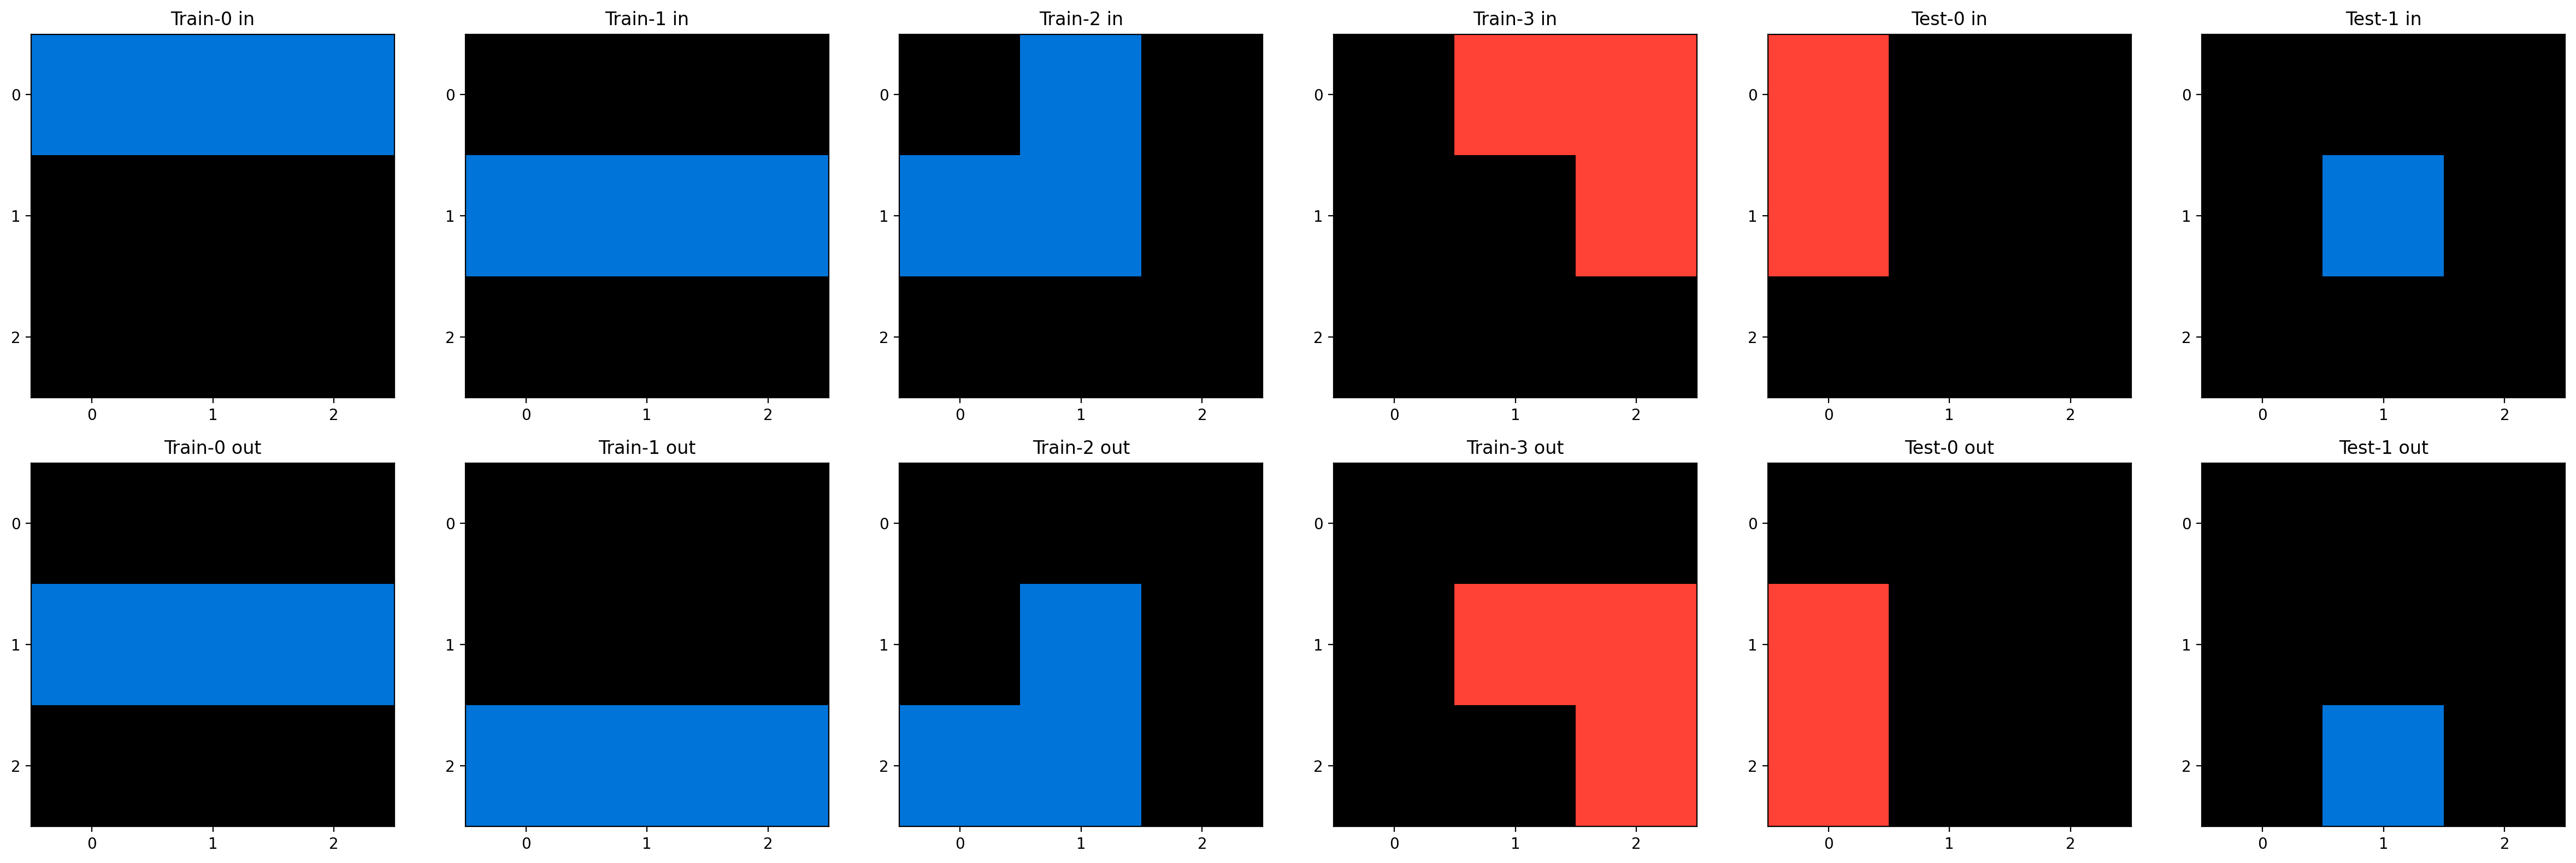

In [4]:
# A task from the training data - Number 52
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
testing_tasks = sorted(os.listdir(training_p))
    
testing_files = []
for t in testing_tasks:    
    with open(str(training_p + '/' + t), 'r') as read_file:
        task = json.load(read_file)
        testing_files.append(task)  
        
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
task = testing_files[52]
print(testing_tasks[52], '\n')
plot_task(task)


## Three functions for task number 52

In [5]:
# Three functions for task number 52
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 1a
def collage_creater_move1(inp_e):
    uinp = np.unique(inp_e)
    cinp = np.unique(inp_e)[1]
    wcolor = np.argwhere(inp_e == cinp)

    wrow, wcol = [], []
    for w in wcolor:
        wrow.append(w[0])
        wcol.append(w[1])
        
    minr = min(wrow)
    maxr = max(wrow)
    minc = min(wcol)
    maxc = max(wcol) 
    
    prn = np.zeros(inp_e.shape)
    pr = inp_e[minr:maxr+1 , minc:maxc+1]  
    
    try:
        prn[minr+1:maxr+2 , minc:maxc+1] = pr  
        
    except:
        prn = np.zeros(inp_e.shape)
        
    return prn

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 1b
def collage_black_move1(task): 
    len_train = len(task['train'])
    
    counter = 0
    state = False
    for e in range(len_train):
        inp_e = np.array(task['train'][e]['input'])
        out_e = np.array(task['train'][e]['output'])
        
        if (inp_e.shape == out_e.shape):
            if (len(np.unique(inp_e)) == 2) and (0 in np.unique(inp_e)):
                if (len(np.unique(out_e)) == 2) and (0 in np.unique(out_e)):
                    if (np.array_equal(collage_creater_move1(inp_e), out_e) == True):
                        if (np.unique(inp_e)[1] == np.unique(out_e)[1]):
                            counter += 1

    if (counter == len_train):
        state = True
        
    return state

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 1c
def collage_answer_move1(task, i): # (i=0 or i=1)
    
    inp_test = np.array(task['test'][i]['input'])
    answer = collage_creater_move1(inp_test)
    
    return answer.tolist()
    
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

## Run functions

In [6]:
collage_black_move1(task)

True

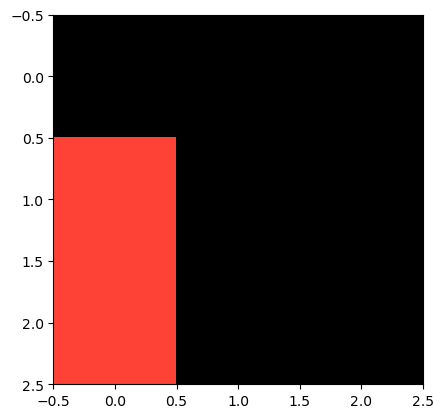

[[0.0, 0.0, 0.0], [2.0, 0.0, 0.0], [2.0, 0.0, 0.0]]

In [7]:
plot_picture(collage_answer_move1(task, 0))
collage_answer_move1(task, 0)

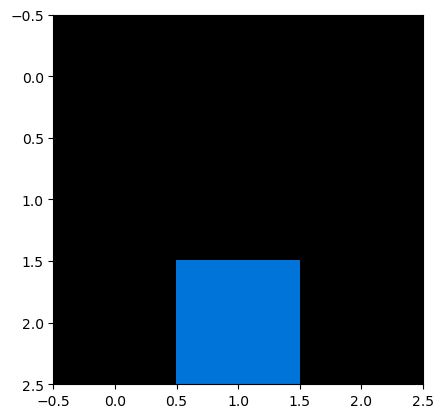

[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 1.0, 0.0]]

In [8]:
plot_picture(collage_answer_move1(task, 1))
collage_answer_move1(task, 1)

<div class="alert alert-success">     
</div>

## A task from the test data - Number 42

1a2e2828.json 



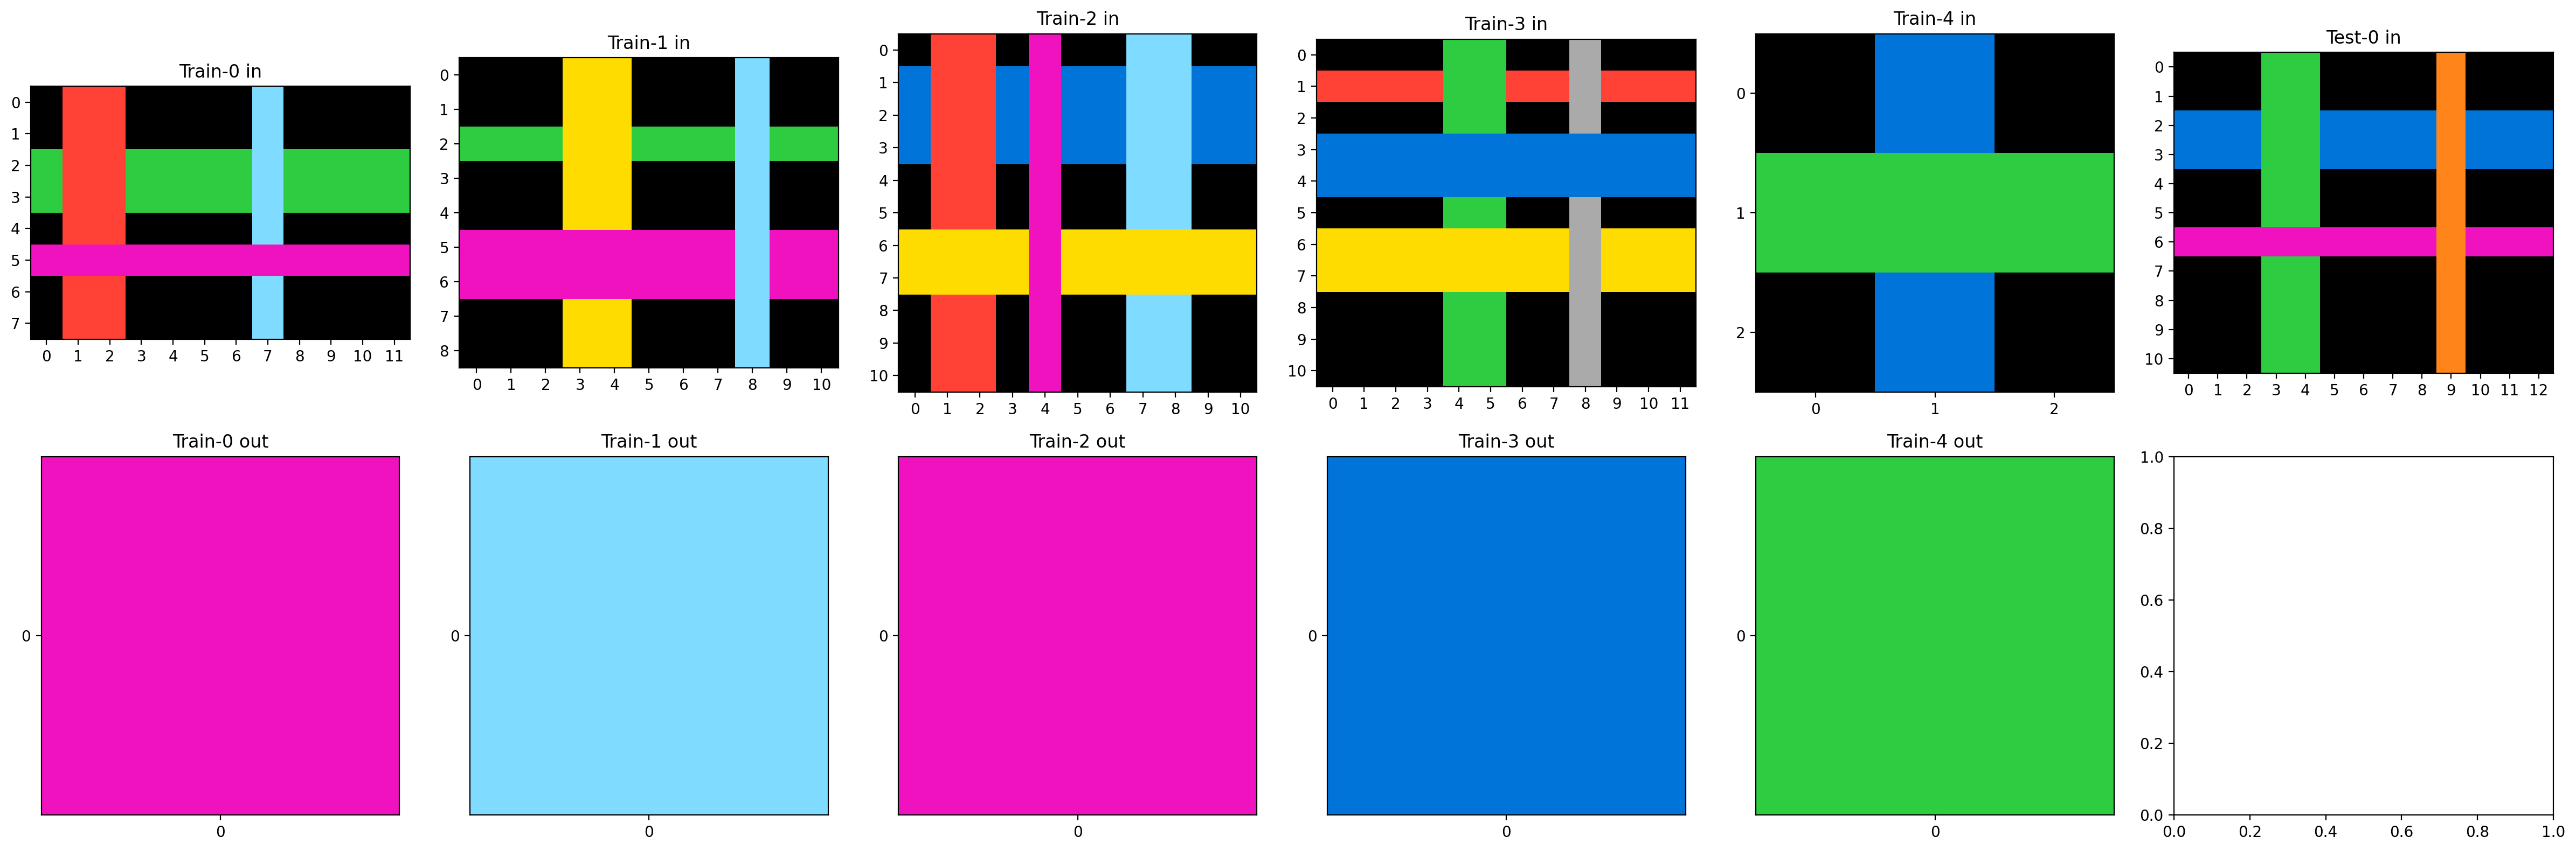

In [9]:
# A task from the test data - Number 42
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
testing_tasks = sorted(os.listdir(test_p))
    
testing_files = []
for t in testing_tasks:    
    with open(str(test_p + '/' + t), 'r') as read_file:
        task = json.load(read_file)
        testing_files.append(task)  
        
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
task = testing_files[42]
print(testing_tasks[42], '\n')
plot_task1(task)

## Two functions for task number 42

In [10]:
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 2a
def same_black_columnrow(task, i): # (i=0 or i=1)
    len_train = len(task['train'])
    
    counter = 0
    state = False
    for e in range(len_train):
        inp_e = np.array(task['train'][e]['input'])
        out_e = np.array(task['train'][e]['output'])
        
        if (len(np.unique(inp_e)) > 2) and (len(np.unique(out_e)) == 1):
            if (0 in np.unique(inp_e)) and (0 not in np.unique(out_e)):
                if (out_e.shape[0] == 1) and (out_e.shape[1] == 1):
                    counter += 1
                    
        same = 0
        for r in range(inp_e.shape[0]-1):
            if (len(np.unique(inp_e[r, :])) == 1):
                if (inp_e[r, 0] != 0) and (inp_e[r+1, 0] == 0):
                    if (inp_e[r, 0] == out_e[0][0]):
                        same += 1
                    
        for c in range(inp_e.shape[1]-1):          
            if (len(np.unique(inp_e[:, c])) == 1):
                if (inp_e[0, c] != 0) and (inp_e[0, c+1] == 0):
                    if (inp_e[0, c] == out_e[0][0]):
                        same += 1
                                    
        if (same == 1):
            counter += 1
 
    # # # # # # # # # # # # # # # # #
    if (counter == (len_train * 2)):
        inp_test = np.array(task['test'][i]['input'])
    
        if (len(np.unique(inp_test)) > 2):
            if (0 in np.unique(inp_test)):
                counter += 1
            
        same = 0
        for r in range(inp_test.shape[0]-1):
            if (len(np.unique(inp_test[r, :])) == 1):
                if (inp_test[r, 0] != 0) and (inp_test[r+1, 0] == 0):
                    same += 1
    
        for c in range(inp_test.shape[1]-1):          
            if (len(np.unique(inp_test[:, c])) == 1):
                if (inp_test[0, c] != 0) and (inp_test[0, c+1] == 0):
                    same += 1   
        if (same == 1):
            counter += 1
            
    if (counter == (len_train * 2) + 2):
        state = True                                            
    return state                                   
                                    
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 2b                                
def same_answer_columnrow(task, i): # (i=0 or i=1) 
    inp_test = np.array(task['test'][i]['input'])
    
    prn = [[]]
    for r in range(inp_test.shape[0]-1):
        if (len(np.unique(inp_test[r, :])) == 1):
            if (inp_test[r, 0] != 0) and (inp_test[r+1, 0] == 0):
                prn = [[inp_test[r, 0]]]
    
    for c in range(inp_test.shape[1]-1):          
        if (len(np.unique(inp_test[:, c])) == 1):
            if (inp_test[0, c] != 0) and (inp_test[0, c+1] == 0):
                prn = [[inp_test[0, c]]] 
    
    answer = prn
    return [answer]

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

## Run functions

In [11]:
same_black_columnrow(task, 0)

True

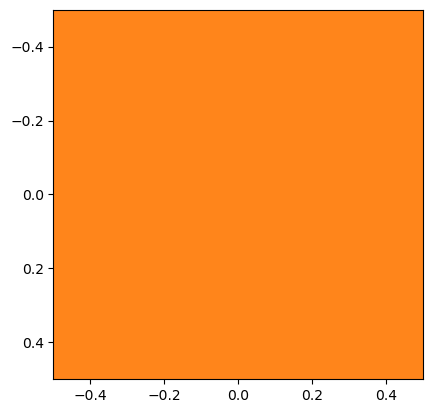

[[[7]]]

In [12]:
plot_picture(same_answer_columnrow(task, 0))
same_answer_columnrow(task, 0)

<div class="alert alert-success">     
</div>

<div class="alert alert-success">     
</div>